In [1]:
import time
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
import numpy as np
import keras # keras.metrics
import shutil
import matplotlib.pyplot as plt
import os

In [2]:
hist=pd.read_csv(r'C:\Users\oguzh\Downloads\bist100.csv')
hist.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-10,25185.000000,25731.500000,25142.000000,25604.699219,25604.699219,363568400.0
1,2005-01-11,25604.699219,26181.099609,25582.000000,26110.199219,26110.199219,405221100.0
2,2005-01-12,26110.199219,26575.000000,25804.099609,26271.300781,26271.300781,394794800.0
3,2005-01-13,26271.300781,26565.599609,26081.800781,26493.000000,26493.000000,377036800.0
4,2005-01-14,26493.000000,26749.800781,26240.099609,26362.699219,26362.699219,508805700.0
5,2005-01-17,26362.699219,26863.199219,26359.900391,26863.199219,26863.199219,300817900.0
6,2005-01-18,26863.199219,26905.900391,26624.300781,26813.099609,26813.099609,249121400.0
7,2005-01-19,26813.099609,26918.099609,26443.199219,26918.099609,26918.099609,141374100.0
8,2005-01-20,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hist.isnull().sum()
hist=hist.dropna()
hist.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-10,25185.000000,25731.500000,25142.000000,25604.699219,25604.699219,363568400.0
1,2005-01-11,25604.699219,26181.099609,25582.000000,26110.199219,26110.199219,405221100.0
2,2005-01-12,26110.199219,26575.000000,25804.099609,26271.300781,26271.300781,394794800.0
3,2005-01-13,26271.300781,26565.599609,26081.800781,26493.000000,26493.000000,377036800.0
4,2005-01-14,26493.000000,26749.800781,26240.099609,26362.699219,26362.699219,508805700.0
5,2005-01-17,26362.699219,26863.199219,26359.900391,26863.199219,26863.199219,300817900.0
6,2005-01-18,26863.199219,26905.900391,26624.300781,26813.099609,26813.099609,249121400.0
7,2005-01-19,26813.099609,26918.099609,26443.199219,26918.099609,26918.099609,141374100.0
10,2005-01-24,26918.099609,26952.500000,26322.400391,26469.400391,26469.400391,328953400.0


In [4]:
temp=pd.read_csv(r'C:\Users\oguzh\Downloads\XU1002.csv')
temp.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,1199.599976,1203.400024,1194.400024,1195.699951,1195.699951,2.729247e+09
1,2020-07-28,1197.099976,1198.199951,1152.699951,1152.699951,1152.699951,4.094110e+09
2,2020-07-29,1156.000000,1159.699951,1121.000000,1135.599976,1135.599976,4.345012e+09
3,2020-07-30,1137.199951,1137.199951,1124.599976,1126.900024,1126.900024,1.403498e+09
4,2020-08-04,1140.400024,1143.300049,1064.900024,1087.199951,1087.199951,4.294045e+09
5,2020-08-05,1095.300049,1100.599976,1066.099976,1091.800049,1091.800049,4.574041e+09
6,2020-08-06,1090.599976,1093.699951,1033.800049,1034.400024,1034.400024,5.070717e+09
7,2020-08-07,1030.300049,1062.099976,985.400024,1060.599976,1060.599976,6.044999e+09
8,2020-08-10,1055.599976,1078.900024,1039.000000,1075.500000,1075.500000,3.799076e+09


In [5]:
temp['Open'] = temp['Open']*100.00
temp['High'] = temp['High']*100.00
temp['Low'] = temp['Low']*100.00
temp['Close'] = temp['Close']*100.00
temp['Adj Close'] = temp['Adj Close']*100.00

In [6]:
temp=temp.dropna()
temp.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,119959.9976,120340.0024,119440.0024,119569.9951,119569.9951,2.729247e+09
1,2020-07-28,119709.9976,119819.9951,115269.9951,115269.9951,115269.9951,4.094110e+09
2,2020-07-29,115600.0000,115969.9951,112100.0000,113559.9976,113559.9976,4.345012e+09
3,2020-07-30,113719.9951,113719.9951,112459.9976,112690.0024,112690.0024,1.403498e+09
4,2020-08-04,114040.0024,114330.0049,106490.0024,108719.9951,108719.9951,4.294045e+09
5,2020-08-05,109530.0049,110059.9976,106609.9976,109180.0049,109180.0049,4.574041e+09
6,2020-08-06,109059.9976,109369.9951,103380.0049,103440.0024,103440.0024,5.070717e+09
7,2020-08-07,103030.0049,106209.9976,98540.0024,106059.9976,106059.9976,6.044999e+09
8,2020-08-10,105559.9976,107890.0024,103900.0000,107550.0000,107550.0000,3.799076e+09


In [7]:
historical = hist.append(temp, ignore_index=True)
historical.tail(83)

,Date,Open,High,Low,Close,Adj Close,Volume
4005,2020-12-24,142019.9951,143230.0049,141540.0024,142600.0000,142600.0000,5.263356e+09
4006,2020-12-28,143169.9951,144280.0049,143169.9951,143930.0049,143930.0049,2.977132e+09
4007,2020-12-29,144300.0000,145969.9951,143619.9951,145969.9951,145969.9951,3.420867e+09
4008,2020-12-30,146309.9976,148319.9951,146309.9976,147990.0024,147990.0024,4.193082e+09
4009,2020-12-31,148080.0049,148440.0024,147030.0049,147669.9951,147669.9951,3.422724e+09
...,...,...,...,...,...,...,...
4083,2021-04-16,140550.0000,141259.9976,140050.0000,140809.9976,140809.9976,2.315176e+09
4084,2021-04-19,140990.0024,141600.0000,137719.9951,137719.9951,137719.9951,2.490438e+09
4085,2021-04-20,137640.0024,138590.0024,135730.0049,136530.0049,136530.0049,2.563179e+09
4086,2021-04-21,136390.0024,136550.0000,130850.0000,133050.0000,133050.0000,2.306411e+09


In [8]:
def prepare_train_test(training_scaled, testing_scaled):
    x_train = []
    y_train = []
    for i in range(60, len(training_scaled)):
        x_train.append(training_scaled[i-60:i, 0])
        y_train.append(training_scaled[i, 0])
    
    x_test= []
    y_test = []
    
    for i in range(60, len(testing_scaled)):
        x_test.append(testing_scaled[i-60:i, 0])
        y_test.append(testing_scaled[i, 0])
    
    x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_train, y_train, x_test, y_test

In [9]:
training = historical[["Close"]].values

In [10]:
scaler = MinMaxScaler(feature_range = (0, 1))
training_scaled= scaler.fit_transform(training)
testing_scaled = training_scaled[-400:]
training_scaled = training_scaled[-4000:-400]

In [11]:
print(len(testing_scaled), len(training_scaled))

400 3600


In [12]:
X_train, y_train, X_test, y_test= prepare_train_test(training_scaled, testing_scaled)

In [13]:
from keras.layers import Dropout

def get_model():
    
    regressor = Sequential()
    regressor.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=200, return_sequences=False))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1, activation='linear'))
    regressor.compile(optimizer='adam', loss='mse')
    return regressor

In [14]:
model = get_model()

In [15]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 60)

Epoch 1/100
59/59 [==============================] - 29s 377ms/step - loss: 0.0179
Epoch 2/100
59/59 [==============================] - 22s 371ms/step - loss: 5.3372e-04
Epoch 3/100
59/59 [==============================] - 22s 366ms/step - loss: 5.0289e-04
Epoch 4/100
59/59 [==============================] - 22s 379ms/step - loss: 4.7046e-04
Epoch 5/100
59/59 [==============================] - 23s 385ms/step - loss: 4.5072e-04
Epoch 6/100
59/59 [==============================] - 24s 412ms/step - loss: 4.5646e-04
Epoch 7/100
59/59 [==============================] - 23s 392ms/step - loss: 4.5720e-04
Epoch 8/100
59/59 [==============================] - 23s 395ms/step - loss: 4.1877e-04
Epoch 9/100
59/59 [==============================] - 22s 371ms/step - loss: 3.9288e-04
Epoch 10/100
59/59 [==============================] - 21s 363ms/step - loss: 4.4265e-04
Epoch 11/100
59/59 [==============================] - 21s 363ms/step - loss: 4.5157e-04
Epoch 12/100
59/59 [=========================

59/59 [==============================] - 21s 353ms/step - loss: 1.5759e-04
Epoch 95/100
59/59 [==============================] - 21s 353ms/step - loss: 1.4326e-04
Epoch 96/100
59/59 [==============================] - 21s 352ms/step - loss: 1.4211e-04
Epoch 97/100
59/59 [==============================] - 21s 353ms/step - loss: 1.4409e-04
Epoch 98/100
59/59 [==============================] - 21s 354ms/step - loss: 1.4659e-04
Epoch 99/100
59/59 [==============================] - 21s 353ms/step - loss: 1.5286e-04
Epoch 100/100
59/59 [==============================] - 21s 352ms/step - loss: 1.4882e-04


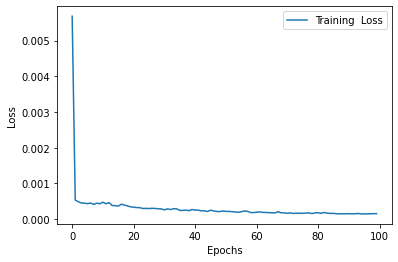

In [16]:
def training_loss_graph(history):
    plt.plot(history.history['loss'], label = 'Training  Loss')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.show()
training_loss_graph(history)

In [17]:
def get_predicted_INV_scaled(X_test):
    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    
    
    prices = scaler.inverse_transform([y_test])
    return prices, predicted_prices
prices, predicted_prices = get_predicted_INV_scaled(X_test)

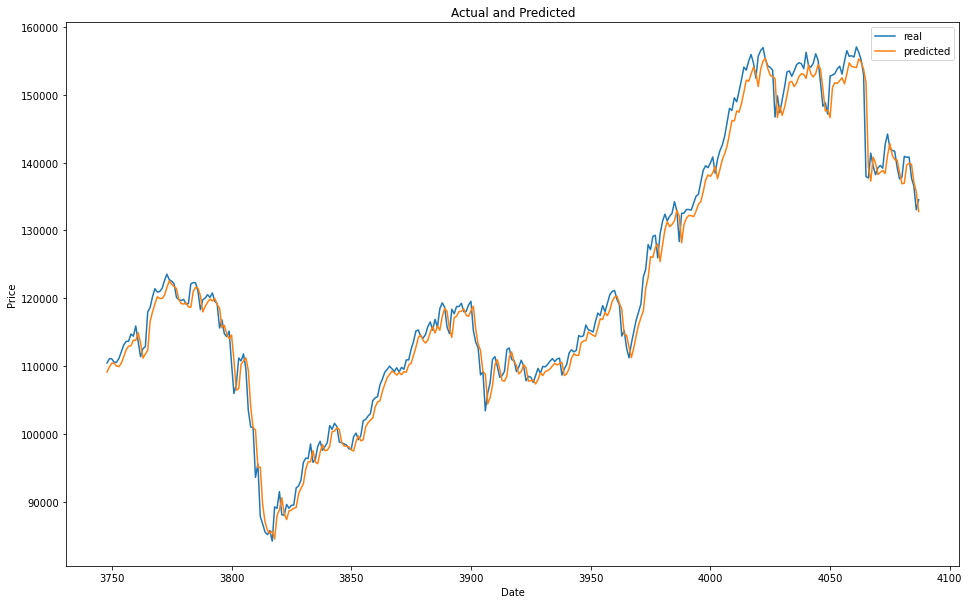

In [18]:
def show_graph_result(prices, predicted_prices):
    index = historical.index.values[-len(prices[0]):]
    test_result = pd.DataFrame(columns = ['real', 'predicted'])
    test_result['real'] = prices[0]
    test_result['predicted'] = predicted_prices
    test_result.index = index
    
    test_result.plot(figsize = (16, 10))
    plt.title("Actual and Predicted")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.show()
show_graph_result(prices, predicted_prices)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def show_error_result(prices, predicted_prices):
    print((mean_squared_error(prices[0],predicted_prices,squared = False)))
    print(r2_score(prices[0],predicted_prices))   
          
show_error_result(prices, predicted_prices)

2225.218678683286
0.9861195162902467
47.17222359273819


In [20]:
x_input=testing_scaled[300:].reshape(1,-1)
x_input.shape

(1, 100)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8195295603558577,
 0.8196767869921611,
 0.8236528979867417,
 0.8236528979867417,
 0.8229165844083981,
 0.8302797201918328,
 0.8379373998144442,
 0.8402199534994694,
 0.8529581246539202,
 0.8661381561141075,
 0.8711451237898948,
 0.869009796741173,
 0.8740903781032685,
 0.8806435873583649,
 0.8630456744281167,
 0.8782137164704662,
 0.8875648628360626,
 0.8936763016156788,
 0.903469308287012,
 0.918490033126488,
 0.933363621159917,
 0.9310073639583267,
 0.9447764816242405,
 0.9405058275267968,
 0.9521396174076753,
 0.9645096317729542,
 0.9780578200223133,
 0.9748180218697626,
 0.9846110285410958,
 0.9918269376882272,
 0.982475701492374,
 0.9662031890825094,
 0.9899861537423684,
 0.9960238890054196,
 0.9992636864216566,
 0.9861572693840912,
 0.9794568334926916,
 0.9777632761831363,
 0.9747444089197677,
 0.9238651583277606,
 0.9469118094092761,
 0.928651196586993,
 0.9426411545755187,
 0.9565574988777359,
 0.9729036249739091,
 0.9738608679688072,
 0.9681911996646715,
 0.9738608679688072

In [22]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8274345]
101
1 day input [0.81967679 0.8236529  0.8236529  0.82291658 0.83027972 0.8379374
 0.84021995 0.85295812 0.86613816 0.87114512 0.8690098  0.87409038
 0.88064359 0.86304567 0.87821372 0.88756486 0.8936763  0.90346931
 0.91849003 0.93336362 0.93100736 0.94477648 0.94050583 0.95213962
 0.96450963 0.97805782 0.97481802 0.98461103 0.99182694 0.9824757
 0.96620319 0.98998615 0.99602389 0.99926369 0.98615727 0.97945683
 0.97776328 0.97474441 0.92386516 0.94691181 0.9286512  0.94264115
 0.9565575  0.97290362 0.97386087 0.9681912  0.97386087 0.98063492
 0.98284386 0.98173939 0.97643797 0.99418311 0.97967776 0.97805782
 0.98232847 0.99256325 0.98542096 0.96134354 0.93564618 0.93947497
 0.92710496 0.96841213 0.96936937 0.97106284 0.97614342 0.97908868
 0.97047384 0.9843901  0.99595028 0.98976522 0.99042792 0.98902891
 1.         0.99388856 0.98564189 0.9695166  0.85929049 0.85789148
 0.88476692 0.87040881 0.86142573 0.86908341 0.87143967 0.86842071
 0.89411807 0.90553093 0.88970019 0.

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [24]:
lastone=historical.reset_index()['Close']

In [25]:
lastone=scaler.fit_transform(np.array(lastone).reshape(-1,1))

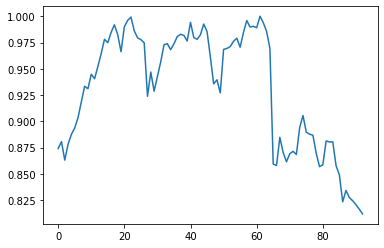

In [26]:
future=lastone.tolist()
future.extend(lst_output)
plt.plot(future[4000:])

In [27]:
future=scaler.inverse_transform(future).tolist()

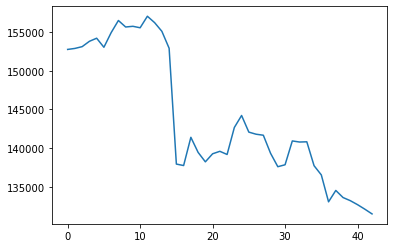

In [28]:
plt.plot(future[4050:])
